In [59]:
import pandas as pd
import numpy as np
from contextlib import chdir
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest
import math
import sys
import gseapy as gp

Import the mutation data

In [2]:
with chdir(".."):
    mutations_df = pd.read_csv("input_data/mutations.csv", sep="\t")

In [3]:
mutations_df.head()

,file_path,project_id,project_name,disease_type,primary_site,Hugo_Symbol,Entrez_Gene_Id,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,CCDS
0,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,KLHL17,339451,chr1,963353,963353,+,Missense_Mutation,SNP,CCDS30550.1
1,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,UBIAD1,29914,chr1,11273542,11273542,+,Missense_Mutation,SNP,CCDS129.1
2,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,PRAMEF1,65121,chr1,12793336,12793336,+,Missense_Mutation,SNP,CCDS148.1
3,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,PLEKHM2,23207,chr1,15727771,15727771,+,Missense_Mutation,SNP,CCDS44063.1
4,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,TMCO4,255104,chr1,19746460,19746460,+,Silent,SNP,CCDS198.1


In [88]:
disease_type_count = mutations_df[['disease_type', 'primary_site']].value_counts().reset_index()
disease_type_count.head()

,disease_type,primary_site,count
0,Adenomas and Adenocarcinomas,Corpus uteri,485913
1,Adenomas and Adenocarcinomas,Bronchus and lung,244919
2,Adenomas and Adenocarcinomas,Colon,231135
3,Adenomas and Adenocarcinomas,Stomach,199128
4,Squamous Cell Neoplasms,Bronchus and lung,179414


In [104]:
disease_x_site = disease_type_count.pivot(index='disease_type', columns='primary_site', values='count')

disease_x_site['total_sum'] = disease_x_site.sum(axis=1)
disease_x_site = disease_x_site.sort_values(by='total_sum', ascending=False).drop('total_sum', axis=1)

column_sums = disease_x_site.sum()
sorted_column_names = column_sums.sort_values(ascending=False).index.tolist()
disease_x_site = disease_x_site[sorted_column_names]

disease_x_site_modified = disease_x_site.iloc[:, :10]
disease_x_site_modified['Other'] = disease_x_site.iloc[:, 10:-1].sum(axis=1)

disease_x_site_modified.head()

/var/folders/6h/q2bgrd9147945_8pqxd8__t40000gp/T/ipykernel_87094/1015668179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_x_site_modified['Other'] = disease_x_site.iloc[:, 10:-1].sum(axis=1)


primary_site,Corpus uteri,Bronchus and lung,Colon,Stomach,Lymph nodes,"Uterus, NOS",Skin,Brain,Hematopoietic and reticuloendothelial systems,Breast,Other
disease_type,,,,,,,,,,,
Adenomas and Adenocarcinomas,485913.0,244919.0,231135.0,199128.0,34.0,161378.0,NaN,NaN,NaN,65.0,237103.0
Nevi and Melanomas,378.0,11206.0,617.0,NaN,166798.0,NaN,140026.0,3352.0,NaN,294.0,63845.0
Squamous Cell Neoplasms,NaN,179414.0,NaN,205.0,NaN,NaN,5070.0,NaN,NaN,71.0,152994.0
"Cystic, Mucinous and Serous Neoplasms",71282.0,2200.0,64167.0,16660.0,NaN,113.0,NaN,NaN,NaN,499.0,54046.0
Ductal and Lobular Neoplasms,NaN,823.0,8251.0,NaN,NaN,NaN,NaN,NaN,NaN,113847.0,38860.0


<Axes: xlabel='disease_type'>

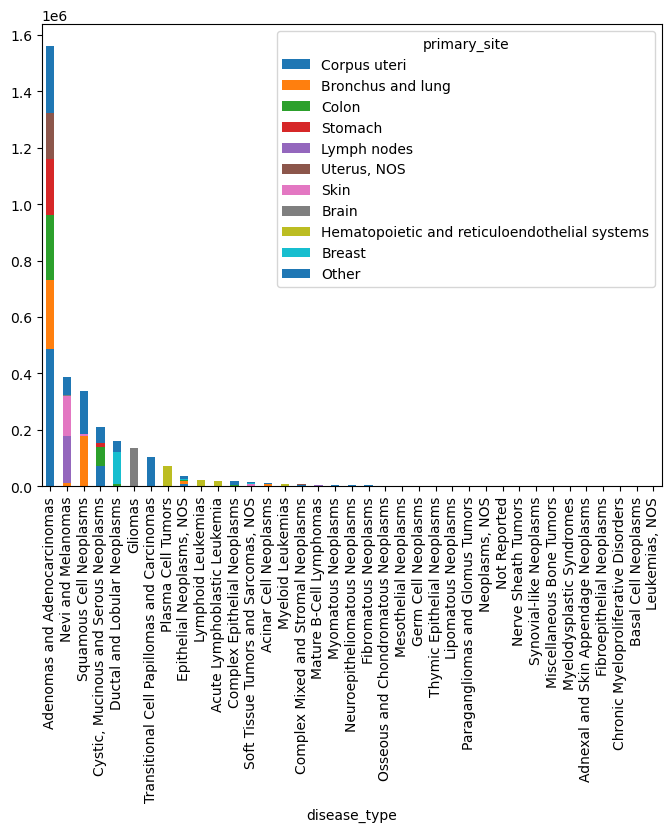

In [105]:
disease_x_site_modified.plot.bar(stacked=True, figsize=(8, 6))

In [ ]:
primary_site_count = mutations_df['primary_site'].value_counts()

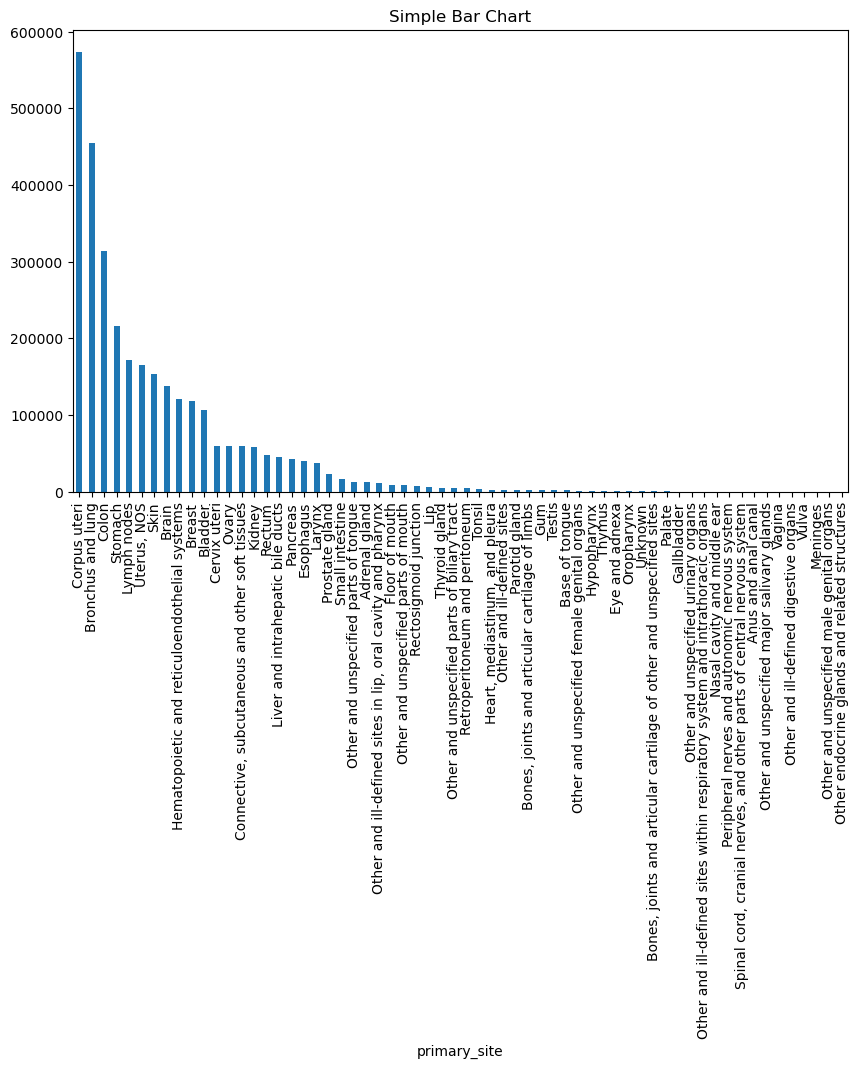

In [5]:
plt.figure(figsize=(10, 6))
primary_site_count.plot(x='primary_site', y='count', kind='bar', title='Simple Bar Chart')
plt.show()

In [6]:
project_name_count = mutations_df['project_name'].value_counts()

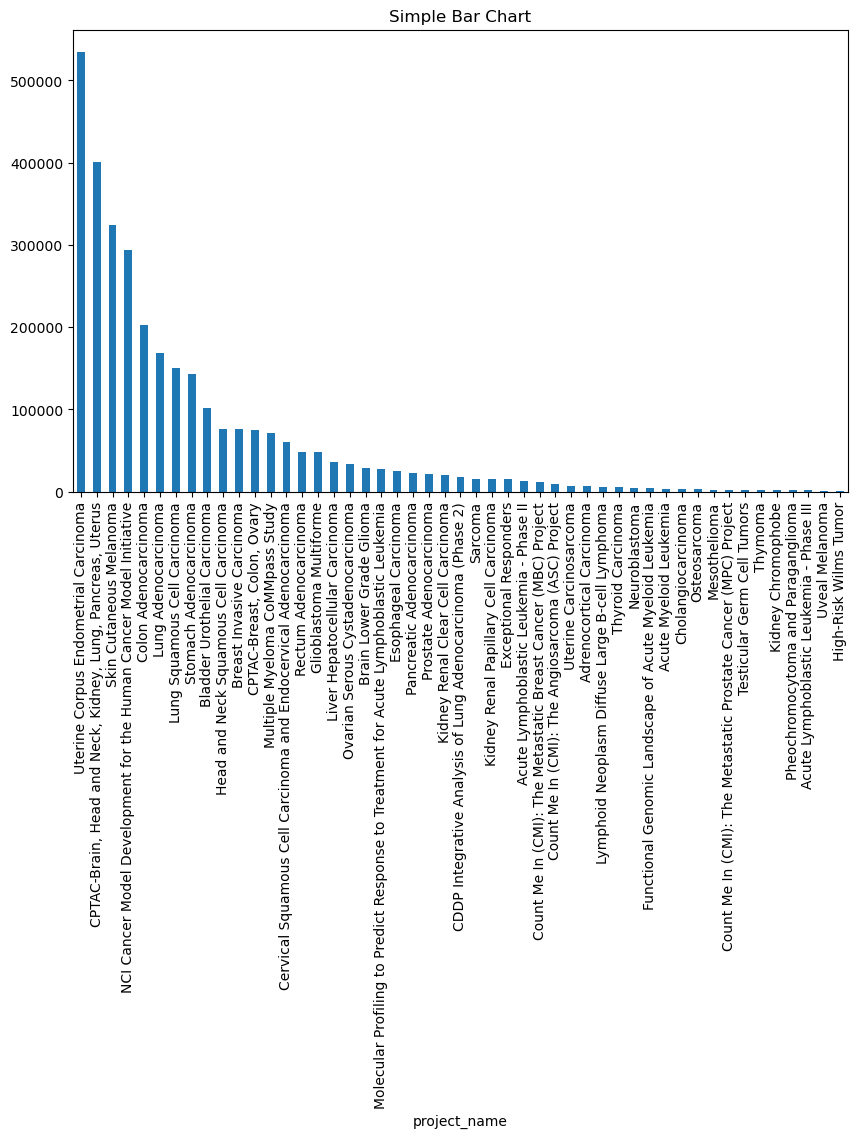

In [82]:
plt.figure(figsize=(10, 6))
project_name_count.plot(x='project_name', y='count', kind='bar', title='Simple Bar Chart')
plt.show()

## Mutation Counts

In [10]:
with chdir(".."):
    counts_df = pd.read_csv("results/counts.csv")

In [11]:
counts_df.head()

,Unnamed: 0,chrom,start,end,gene,type,silent_count,missense_count
0,0,chr1,65564.0,65572.0,OR4F5,normal,0,0
1,1,chr1,69036.0,69431.0,OR4F5,normal,3,4
2,2,chr1,69432.0,69458.0,OR4F5,SAE,0,1
3,3,chr1,69459.0,69626.0,OR4F5,normal,3,9
4,4,chr1,69627.0,69662.0,OR4F5,SAE,0,1


In [12]:
counts_df['interval_len'] = counts_df['end'] - counts_df['start']

In [13]:
sum_by_gene = counts_df.groupby(['gene', 'type'])[['interval_len', 'silent_count', 'missense_count']].sum()

In [14]:
sum_by_gene['silent_freq'] = sum_by_gene['silent_count'] / sum_by_gene['interval_len']
sum_by_gene['missense_freq'] = sum_by_gene['missense_count'] / sum_by_gene['interval_len']
sum_by_gene['total_count'] = sum_by_gene['silent_count'] + sum_by_gene['missense_count']
sum_by_gene['total_freq'] = sum_by_gene['total_count'] / sum_by_gene['interval_len']

In [15]:
sum_by_gene.head()

interval_len  silent_count  missense_count  silent_freq  \
gene type                                                              
A1BG SCE            175.0             3               7     0.017143   
     normal        1481.0            51              82     0.034436   
A1CF SAE            161.0             8              25     0.049689   
     SCE            215.0            12              34     0.055814   
     normal        1503.0            64             156     0.042582   

             missense_freq  total_count  total_freq  
gene type                                            
A1BG SCE          0.040000           10    0.057143  
     normal       0.055368          133    0.089804  
A1CF SAE          0.155280           33    0.204969  
     SCE          0.158140           46    0.213953  
     normal       0.103792          220    0.146374

In [16]:
sums_sorted_by_silent_freq = sum_by_gene.sort_values(by='silent_freq', ascending=False)
sums_sorted_by_missense_freq = sum_by_gene.sort_values(by='missense_freq', ascending=False)

In [17]:
sums_sorted_by_missense_freq.head()

,,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
gene,type,,,,,,,
KRAS,SCE,105.0,5,1685,0.047619,16.047619,1690,16.095238
TP53,SAE,90.0,4,645,0.044444,7.166667,649,7.211111
NRAS,SCE,73.0,3,409,0.041096,5.602740,412,5.643836
KRAS,SAE,100.0,1,116,0.010000,1.160000,117,1.170000
FBXW7,SAE,169.0,2,165,0.011834,0.976331,167,0.988166


In [18]:
sums_sorted_by_silent_freq.head()

,,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
gene,type,,,,,,,
KLRD1,SCE,6.0,4,0,0.666667,0.000000,4,0.666667
PIRT,SAE,44.0,24,3,0.545455,0.068182,27,0.613636
POM121L12,SAE,56.0,23,35,0.410714,0.625000,58,1.035714
TGIF2LX,SAE,26.0,10,8,0.384615,0.307692,18,0.692308
PRSS58,SAE,26.0,10,4,0.384615,0.153846,14,0.538462


In [19]:
sum_by_gene = sum_by_gene.reset_index()
sum_by_gene.head()

,gene,type,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
0,A1BG,SCE,175.0,3,7,0.017143,0.040000,10,0.057143
1,A1BG,normal,1481.0,51,82,0.034436,0.055368,133,0.089804
2,A1CF,SAE,161.0,8,25,0.049689,0.155280,33,0.204969
3,A1CF,SCE,215.0,12,34,0.055814,0.158140,46,0.213953
4,A1CF,normal,1503.0,64,156,0.042582,0.103792,220,0.146374


In [20]:
counts = sum_by_gene.groupby('gene')['gene'].transform('count')
sum_by_gene_filtered = sum_by_gene[counts == 3].reset_index(drop=True)
sum_by_gene_filtered.head()

,gene,type,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
0,A1CF,SAE,161.0,8,25,0.049689,0.155280,33,0.204969
1,A1CF,SCE,215.0,12,34,0.055814,0.158140,46,0.213953
2,A1CF,normal,1503.0,64,156,0.042582,0.103792,220,0.146374
3,A2M,SAE,26.0,0,2,0.000000,0.076923,2,0.076923
4,A2M,SCE,54.0,1,3,0.018519,0.055556,4,0.074074


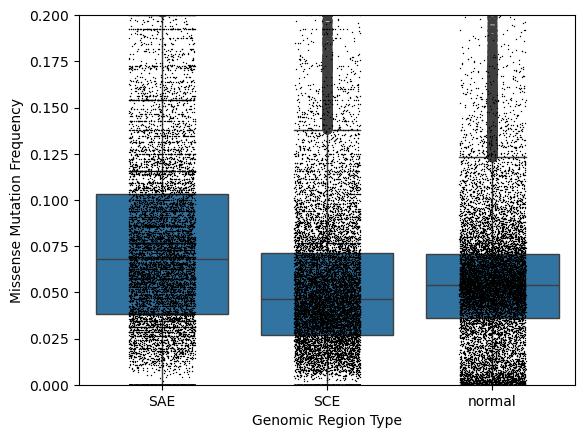

In [21]:
fig, ax = plt.subplots()

sns.boxplot(x ="type", 
            y ="missense_freq", 
            data = sum_by_gene_filtered,
            )

sns.stripplot(x="type",
              y="missense_freq",
              data=sum_by_gene_filtered, 
              color="black", 
              size=1,
              jitter=0.2,
              ax=ax
              )

ax.set_xlabel('Genomic Region Type')
ax.set_ylabel('Missense Mutation Frequency')
ax.set_ylim(0, 0.2)

plt.show()


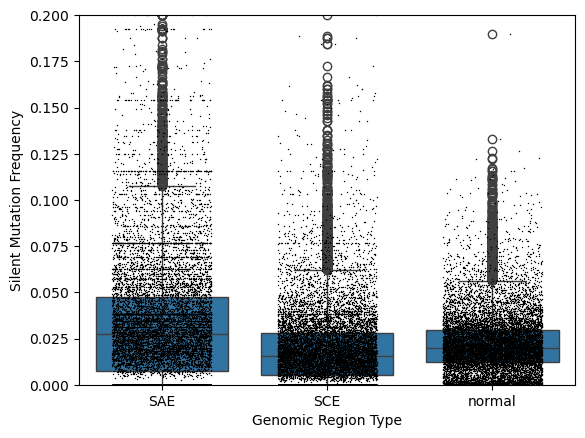

In [22]:
fig, ax = plt.subplots()

sns.boxplot(x ="type", 
            y ="silent_freq", 
            data = sum_by_gene_filtered,
            ax=ax
            )

sns.stripplot(x="type",
              y="silent_freq",
              data=sum_by_gene_filtered, 
              color="black", 
              size=1,
              jitter=0.3,
              ax=ax
              )

ax.set_xlabel('Genomic Region Type')
ax.set_ylabel('Silent Mutation Frequency')
ax.set_ylim(0, 0.2)

plt.show()

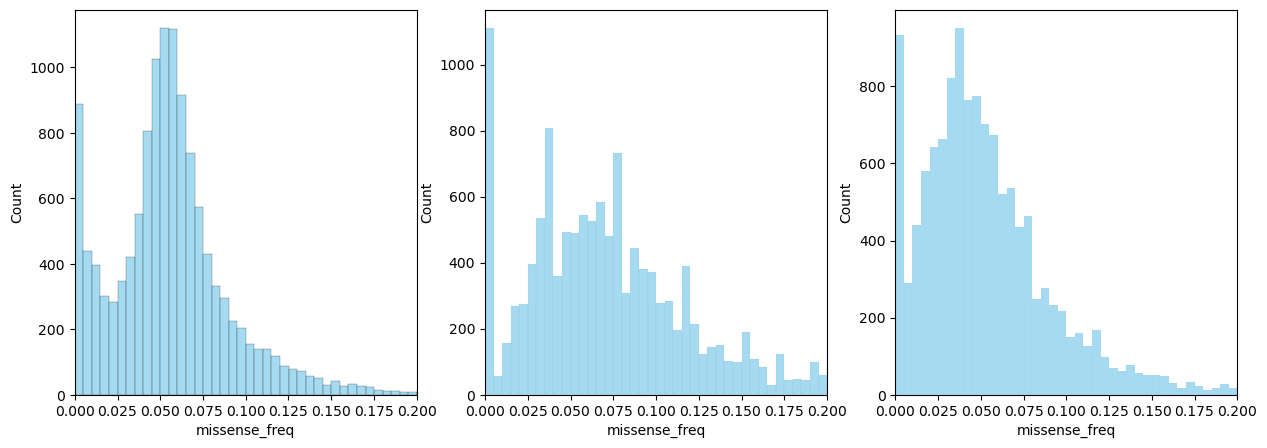

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

normal_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal']['missense_freq'])

SAE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE']['missense_freq'])

SCE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE']['missense_freq'])

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal'], 
             x='missense_freq',
             color='skyblue',
             bins=int(normal_max * 200),
             ax=axes[0]
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE'], 
             x='missense_freq',
             color='skyblue',
             bins=int(SAE_max * 200),
             ax=axes[1]
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE'], 
             x='missense_freq',
             color='skyblue',
             bins=int(SCE_max * 200),
             ax=axes[2]
            )


for n in range(3):
    axes[n].set_xlim(0, 0.2)

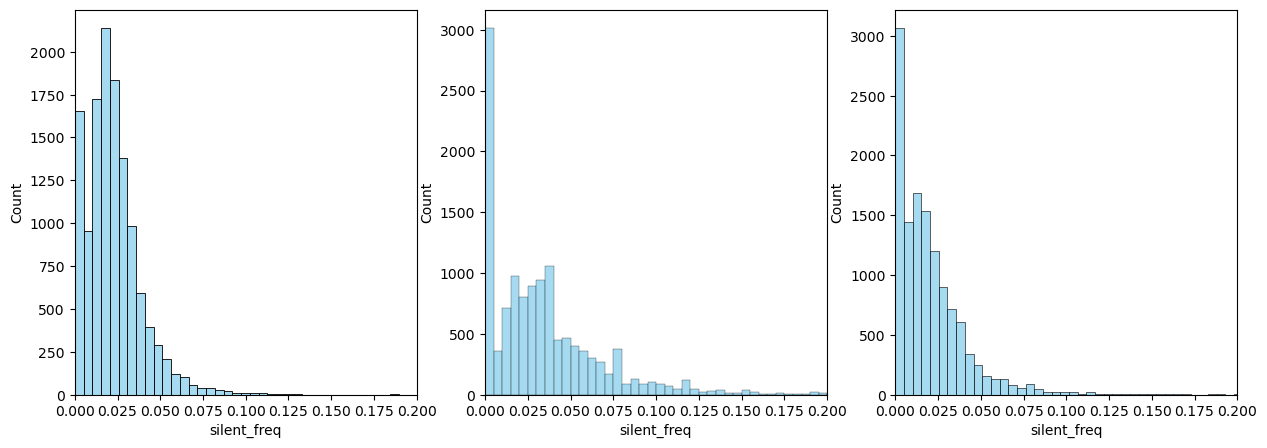

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

normal_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal']['silent_freq'])

SAE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE']['silent_freq'])

SCE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE']['silent_freq'])

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal'], 
             x='silent_freq',
             color='skyblue',
             bins=int(normal_max * 200),
             ax=axes[0]
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE'], 
             x='silent_freq',
             color='skyblue',
             bins=int(SAE_max * 200),
             ax=axes[1]
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE'], 
             x='silent_freq',
             color='skyblue',
             bins=int(SCE_max * 200),
             ax=axes[2]
            )

for n in range(3):
    axes[n].set_xlim(0, 0.2)

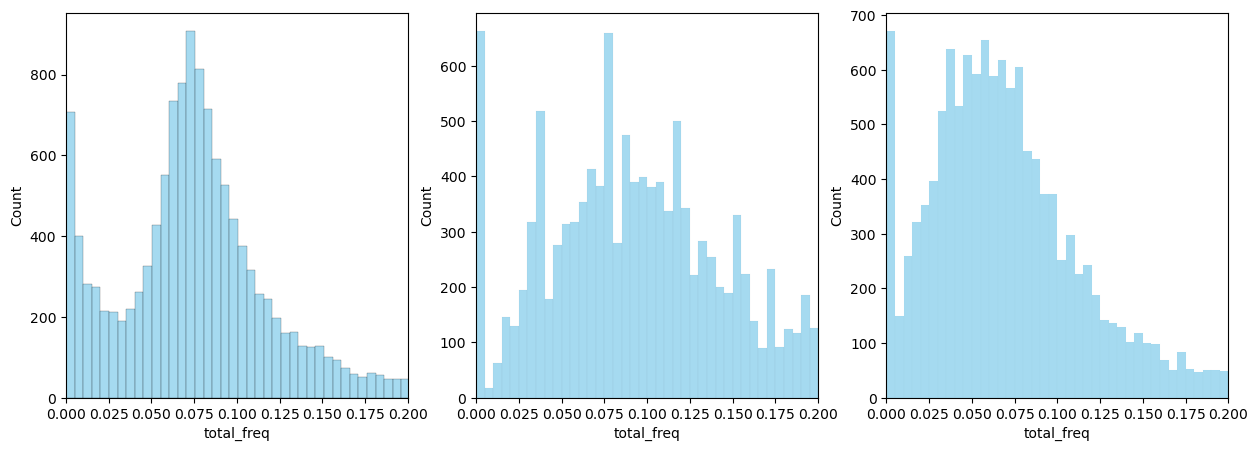

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

normal_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal']['total_freq'])

SAE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE']['total_freq'])

SCE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE']['total_freq'])

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal'], 
             x='total_freq',
             color='skyblue',
             bins=int(normal_max * 200),
             ax=axes[0]
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE'], 
             x='total_freq',
             color='skyblue',
             bins=int(SAE_max * 200),
             ax=axes[1]
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE'], 
             x='total_freq',
             color='skyblue',
             bins=int(SCE_max * 200),
             ax=axes[2]
            )

for n in range(3):
    axes[n].set_xlim(0, 0.2)

# Checking for over or under representation of mutations in SAE and SCE regions

In [26]:
SAE = sum_by_gene[sum_by_gene['type'] == 'SAE']
SCE = sum_by_gene[sum_by_gene['type'] == 'SCE']
normal = sum_by_gene[sum_by_gene['type'] == 'normal']

genes_with_SAE = SAE['gene'].to_list()
genes_with_SCE = SCE['gene'].to_list()

In [27]:
results_df = pd.DataFrame({'gene': [], 'type': [], 'region_mutation_count': [], 'total_mutation_count': [], 'region_len': [], 'total_len': [], 'p_hypothesized': [], 'p_actual': [], 'pvalue': []})

for gene in genes_with_SAE:
    gene_df = sum_by_gene[sum_by_gene['gene'] == gene]

    SAE_count = gene_df[gene_df['type'] == 'SAE']['missense_count'].sum()
    normal_count = gene_df[gene_df['type'] == 'normal']['missense_count'].sum()
    total_count = SAE_count + normal_count

    SAE_len = gene_df[gene_df['type'] == 'SAE']['interval_len'].sum()
    normal_len = gene_df[gene_df['type'] == 'normal']['interval_len'].sum()
    total_len = SAE_len + normal_len

    p_hypothesized = SAE_len / total_len

    if total_count != 0:
        result = binomtest(SAE_count, total_count, p=p_hypothesized, alternative='two-sided')

        results_df.loc[results_df.shape[0]] = [gene, "SAE", int(SAE_count), int(total_count), int(SAE_len), int(total_len), float(p_hypothesized), float(result.statistic), float(result.pvalue)]

for gene in genes_with_SCE:
    gene_df = sum_by_gene[sum_by_gene['gene'] == gene]

    SCE_count = gene_df[gene_df['type'] == 'SCE']['missense_count'].sum()
    normal_count = gene_df[gene_df['type'] == 'normal']['missense_count'].sum()
    total_count = SCE_count + normal_count

    SCE_len = gene_df[gene_df['type'] == 'SCE']['interval_len'].sum()
    normal_len = gene_df[gene_df['type'] == 'normal']['interval_len'].sum()
    total_len = SCE_len + normal_len

    p_hypothesized = SCE_len / total_len

    if total_count != 0:
        result = binomtest(SCE_count, total_count, p=p_hypothesized, alternative='two-sided')

        results_df.loc[results_df.shape[0]] = [gene, "SCE", int(SCE_count), int(total_count), int(SCE_len), int(total_len), float(p_hypothesized), float(result.statistic), float(result.pvalue)]

results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue
0,A1CF,SAE,25,181,161,1664,0.096755,0.138122,0.076528
1,A2M,SAE,2,337,26,4329,0.006006,0.005935,1.000000
2,A3GALT2,SAE,0,32,35,985,0.035533,0.000000,0.629583
3,A4GALT,SAE,4,68,47,1025,0.045854,0.058824,0.555184
4,A4GNT,SAE,0,88,26,934,0.027837,0.000000,0.182722


In [28]:
results_df.shape

(29569, 9)

In [32]:
results_df = results_df.sort_values(by=['pvalue'], ascending=[True]).reset_index(drop=True)
results_df['pvalue'] = results_df['pvalue'].replace(0, sys.float_info.min)

In [33]:
results_df

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254
...,...,...,...,...,...,...,...,...,...
29564,AHR,SAE,0,155,26,419751,0.000062,0.000000,1.000000e+00
29565,AGRP,SAE,2,13,61,336,0.181548,0.153846,1.000000e+00
29566,ZNF853,SCE,2,45,98,1922,0.050989,0.044444,1.000000e+00
29567,ADCY3,SAE,4,186,108,4093,0.026387,0.021505,1.000000e+00


In [34]:
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multitest import fdrcorrection

In [35]:
alpha = 0.05

rejectedBonf, p_adjBonf, _, alphacBonf = multipletests(results_df['pvalue'], alpha=alpha, method='bonferroni')
rejectedBH, p_adjBH = fdrcorrection(results_df['pvalue'])

In [36]:
results_df['rejectedBonf'] = rejectedBonf
results_df['p_adjBonf'] = p_adjBonf
results_df['alphacBonf'] = alphacBonf
results_df['rejectedBH'] = rejectedBH
results_df['p_adjBH'] = p_adjBH

In [37]:
results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258,True,2.850994e-253,0.000002,True,7.127486e-254
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254,True,1.474176e-249,0.000002,True,2.948351e-250


In [38]:
results_df[results_df['rejectedBonf'] == True].shape

(1551, 14)

In [39]:
results_df[results_df['rejectedBH'] == True].shape

(3803, 14)

In [40]:
SAE_mutation_rate = results_df['region_mutation_count'] / results_df['region_len']
normal_mutation_rate = (results_df['total_mutation_count'] - results_df['region_mutation_count']) / (results_df['total_len'] - results_df['region_len'])

results_df['fold_change'] = SAE_mutation_rate / normal_mutation_rate

In [41]:
results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH,fold_change
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,522.367389
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,140.702569
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,18.887107
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258,True,2.850994e-253,0.000002,True,7.127486e-254,1589.739348
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254,True,1.474176e-249,0.000002,True,2.948351e-250,80.221217


In [42]:
results_df['log2_fold_change'] = np.log2(results_df['fold_change'])
results_df['-log_pvalue_Bonf'] = -np.log(results_df['p_adjBonf'])
results_df['-log_pvalue_BH'] = -np.log(results_df['p_adjBH'])

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
results_df

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH,fold_change,log2_fold_change,-log_pvalue_Bonf,-log_pvalue_BH
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,522.367389,9.028921,698.101937,699.200549
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,140.702569,7.136505,698.101937,699.200549
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,18.887107,4.239330,698.101937,699.200549
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258,True,2.850994e-253,0.000002,True,7.127486e-254,1589.739348,10.634575,581.506361,582.892655
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254,True,1.474176e-249,0.000002,True,2.948351e-250,80.221217,6.325912,572.955589,574.565027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29564,AHR,SAE,0,155,26,419751,0.000062,0.000000,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.000000,-inf,-0.000000,-0.000000
29565,AGRP,SAE,2,13,61,336,0.181548,0.153846,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.819672,-0.286881,-0.000000,-0.000000
29566,ZNF853,SCE,2,45,98,1922,0.050989,0.044444,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.865686,-0.208085,-0.000000,-0.000000
29567,ADCY3,SAE,4,186,108,4093,0.026387,0.021505,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.810948,-0.302318,-0.000000,-0.000000


In [44]:
SAE_results_df = results_df[results_df['type'] == 'SAE']
SCE_results_df = results_df[results_df['type'] == 'SCE']

[Text(4.239329810150954, 698.1019367380483, 'TP53'), Text(6.325911942140782, 572.9555892175318, 'NRXN1'), Text(10.052987926824702, 469.53623883678637, 'TPTE'), Text(11.350855354383482, 359.93495245429403, 'RBFOX1'), Text(5.978707869579162, 287.37084096280915, 'NAV3'), Text(5.238758470230798, 283.49455353949446, 'KRAS'), Text(5.149448405782239, 260.53796006835626, 'TENM3'), Text(9.039794953234775, 245.27568338889986, 'NTM'), Text(9.177226792259026, 238.7277715268588, 'BRD1'), Text(3.877965948523194, 235.28353730752562, 'ANK3'), Text(6.809885224482025, 232.8506901731141, 'GRM3'), Text(8.797760581461613, 231.6952784162776, 'AQP7B'), Text(10.123848557372419, 222.10005816561542, 'TFAP2D'), Text(5.7833844267783325, 189.86695992237338, 'KCNH1'), Text(4.699826849715775, 189.79837018681474, 'KCNMA1'), Text(10.570071733269495, 186.15518225247243, 'IRX1'), Text(5.391171103612439, 179.4743260603338, 'GRIK2'), Text(4.903467854953541, 165.02081001617213, 'TRPS1'), Text(8.98807965579564, 158.24372950

/var/folders/6h/q2bgrd9147945_8pqxd8__t40000gp/T/ipykernel_87094/3161787816.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SAE_results_df['significance'] = 'Not Significant'


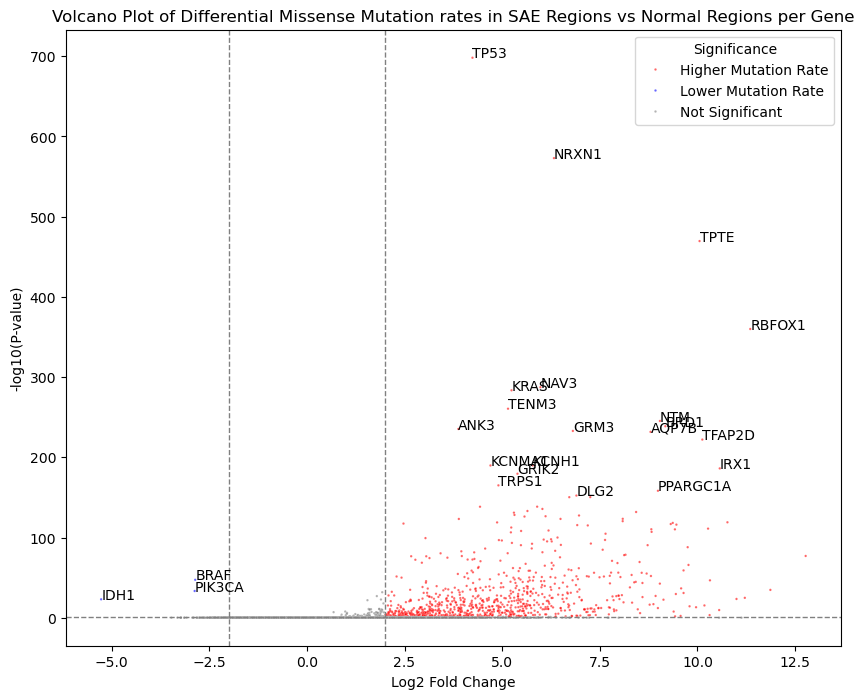

In [54]:
log2fc_threshold = 2.0
pvalue_threshold = 0.05
neg_log10_pvalue_threshold = -np.log10(pvalue_threshold)

log2FC_column = 'log2_fold_change'
neg_log10_pvalue_column = '-log_pvalue_Bonf'

# 4. Categorize genes for coloring
SAE_results_df['significance'] = 'Not Significant'
SAE_results_df.loc[(SAE_results_df[log2FC_column] > log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Higher Mutation Rate'
SAE_results_df.loc[(SAE_results_df[log2FC_column] < -log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Lower Mutation Rate'

# 5. Create the volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=SAE_results_df,
    x=log2FC_column,
    y=neg_log10_pvalue_column,
    hue='significance',
    palette={'Higher Mutation Rate': 'red', 'Lower Mutation Rate': 'blue', 'Not Significant': 'grey'},
    alpha=0.6,
    s=3
)

# 6. Add significance lines
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=neg_log10_pvalue_threshold, color='grey', linestyle='--', linewidth=1)

# 7. Label selected genes
# You might want to label only the most significant or specific genes
genes_to_label = SAE_results_df[
    ((SAE_results_df[log2FC_column].abs() > log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(20) # Example: top 20 significant genes

neg_genes_to_label = SAE_results_df[
    ((SAE_results_df[log2FC_column] < -log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(3)

texts = []
for i, row in genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))
for i, row in neg_genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))

print(texts)

# 8. Add labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Missense Mutation rates in SAE Regions vs Normal Regions per Gene")
plt.legend(title="Significance")
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/var/folders/6h/q2bgrd9147945_8pqxd8__t40000gp/T/ipykernel_87094/3970628817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCE_results_df['significance'] = 'Not Significant'
/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/matplotlib/transforms.py:352: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


[Text(9.028921023281049, 698.1019367380483, 'KRAS'), Text(7.136504864429176, 698.1019367380483, 'NRAS'), Text(10.634574527128596, 581.506360650301, 'RBFOX1'), Text(6.113819414620822, 449.82703933511505, 'MECOM'), Text(5.5027453129252715, 414.41760438314145, 'NRXN1'), Text(5.5340548228206865, 399.9789265767028, 'NAV3'), Text(8.392035115698459, 300.12491726806303, 'AQP7B'), Text(5.411204112441169, 272.7539687919508, 'KIAA1217'), Text(5.015698879246772, 253.1738273859513, 'GRM7'), Text(4.773514867915742, 251.16162689323065, 'TRPS1'), Text(4.517627986742077, 242.45415705890557, 'TENM3'), Text(8.556675182304327, 241.45350944013444, 'TPTE'), Text(3.4562895428518763, 237.31187107785647, 'ANK3'), Text(6.133865677251393, 232.94126764868693, 'PAX5'), Text(8.804869185826554, 228.69780451169783, 'CDH4'), Text(8.332366842542339, 223.21669357786593, 'PPARGC1A'), Text(4.958606474526765, 210.60270797603008, 'PPP2R1A'), Text(4.8678631208050716, 205.97820157579795, 'GRIK2'), Text(10.372489130328521, 193

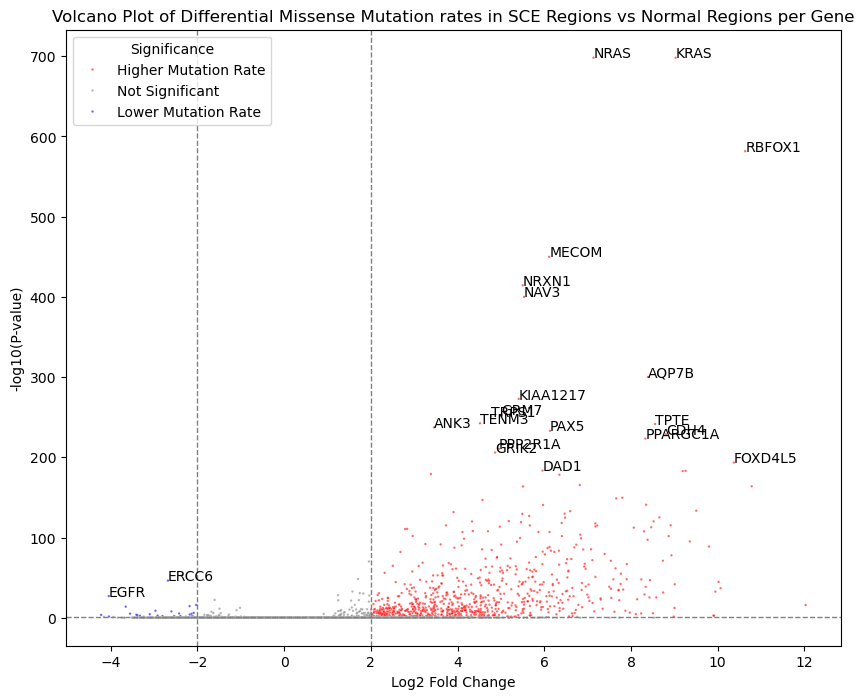

In [53]:
log2fc_threshold = 2.0
pvalue_threshold = 0.05
neg_log10_pvalue_threshold = -np.log10(pvalue_threshold)

log2FC_column = 'log2_fold_change'
neg_log10_pvalue_column = '-log_pvalue_Bonf'

# 4. Categorize genes for coloring
SCE_results_df['significance'] = 'Not Significant'
SCE_results_df.loc[(SCE_results_df[log2FC_column] > log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Higher Mutation Rate'
SCE_results_df.loc[(SCE_results_df[log2FC_column] < -log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Lower Mutation Rate'

# 5. Create the volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=SCE_results_df,
    x=log2FC_column,
    y=neg_log10_pvalue_column,
    hue='significance',
    palette={'Higher Mutation Rate': 'red', 'Lower Mutation Rate': 'blue', 'Not Significant': 'grey'},
    alpha=0.6,
    s=3
)

# 6. Add significance lines
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=neg_log10_pvalue_threshold, color='grey', linestyle='--', linewidth=1)

# 7. Label selected genes
# You might want to label only the most significant or specific genes
genes_to_label = SCE_results_df[
    ((SCE_results_df[log2FC_column].abs() > log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(20) # Example: top 20 significant genes

neg_genes_to_label = SCE_results_df[
    ((SCE_results_df[log2FC_column] < -log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(3)

texts = []
for i, row in genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))
for i, row in neg_genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))

print(texts)

# 8. Add labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Missense Mutation rates in SCE Regions vs Normal Regions per Gene")
plt.legend(title="Significance")
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Gene Set Enrichment Analysis

In [72]:
SAE_results_df_sorted = SAE_results_df.sort_values(by='-log_pvalue_Bonf', ascending=False)

SAE_significant_genes = SAE_results_df_sorted[SAE_results_df_sorted['rejectedBonf']]['gene']
SAE_top1000 = SAE_results_df_sorted.head(1000)['gene']
SAE_top500 = SAE_results_df_sorted.head(500)['gene']
SAE_top100 = SAE_results_df_sorted.head(100)['gene']

In [75]:
SAE_enriched_significant = gp.enrichr(gene_list=SAE_significant_genes, 
                            gene_sets='GO_Biological_Process_2021', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top1000 = gp.enrichr(gene_list=SAE_top1000, 
                            gene_sets='GO_Biological_Process_2021', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top500 = gp.enrichr(gene_list=SAE_top500, 
                            gene_sets='GO_Biological_Process_2021', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top100 = gp.enrichr(gene_list=SAE_top100, 
                            gene_sets='GO_Biological_Process_2021', 
                            organism='human', 
                            outdir=None,
                            )

In [76]:
SAE_enriched_significant.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,modulation of chemical synaptic transmission (...,17/109,9.564403e-07,0.002361,0,0,4.670582,64.734486,PXK;NLGN4X;FMR1;CHRNA7;GRIK1;GRIK2;RIMS2;GRM3;...
1,GO_Biological_Process_2021,"negative regulation of transcription, DNA-temp...",67/948,1.411840e-06,0.002361,0,0,1.973319,26.581817,THRB;TCF25;PRDM5;EHMT1;PTPRK;BACH1;GLI3;SHH;ME...
2,GO_Biological_Process_2021,anterograde trans-synaptic signaling (GO:0098916),26/244,3.151925e-06,0.002660,0,0,3.030761,38.392155,CHRNA7;NRXN1;GRIK1;GRIK2;DBH;GRM3;ATXN3;GRM5;G...
3,GO_Biological_Process_2021,chemical synaptic transmission (GO:0007268),30/306,3.181485e-06,0.002660,0,0,2.768525,35.044440,CHRNA7;NRXN1;GRIK1;GRIK2;DBH;GRM3;RIMS1;ATXN3;...
4,GO_Biological_Process_2021,"regulation of transcription, DNA-templated (GO...",127/2244,6.138190e-06,0.003842,0,0,1.586365,19.037939,NCF1;PRDM5;EHMT1;RORA;BACH1;HOXA13;ZNF607;ZSCA...
...,...,...,...,...,...,...,...,...,...,...
3339,GO_Biological_Process_2021,mitochondrial translation (GO:0032543),1/105,9.843160e-01,0.985495,0,0,0.237859,0.003760,MRPS25
3340,GO_Biological_Process_2021,peptide biosynthetic process (GO:0043043),2/162,9.876614e-01,0.988548,0,0,0.308711,0.003833,HBS1L;RPL22
3341,GO_Biological_Process_2021,sulfur compound biosynthetic process (GO:0044272),1/113,9.885819e-01,0.989174,0,0,0.220777,0.002535,TPK1
3342,GO_Biological_Process_2021,translation (GO:0006412),3/214,9.902740e-01,0.990570,0,0,0.350656,0.003427,HBS1L;RPL22;DRG2


/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


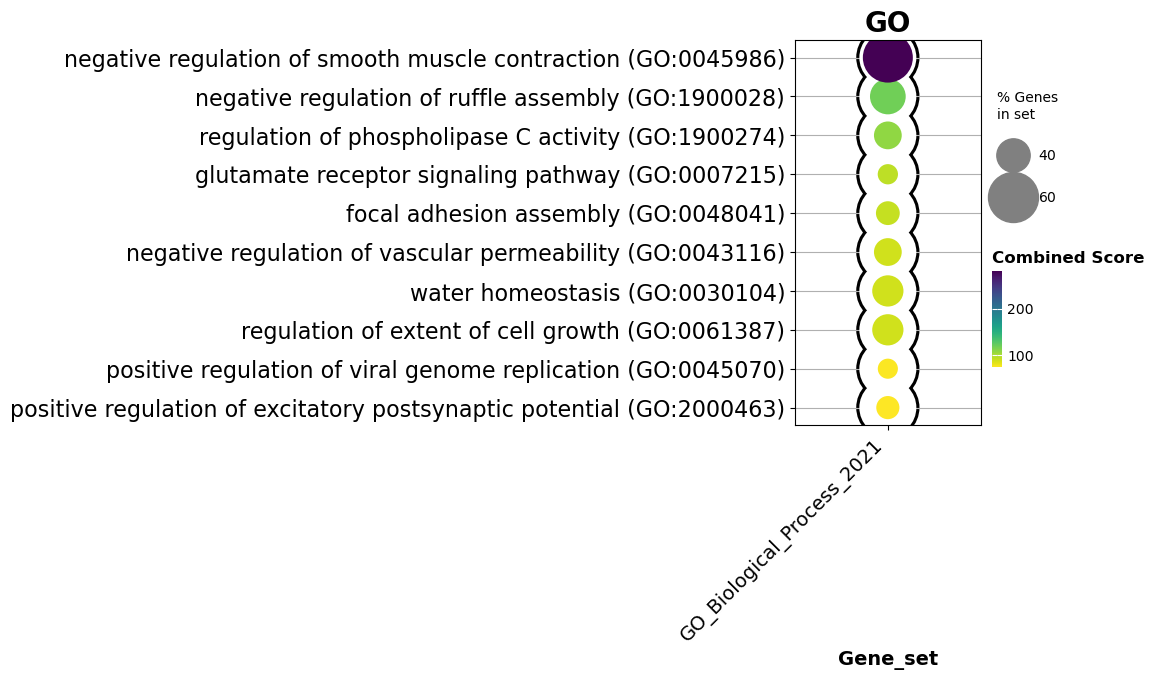

In [81]:
ax = gp.dotplot(SAE_enriched_significant.results,
              column="Combined Score",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "GO",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


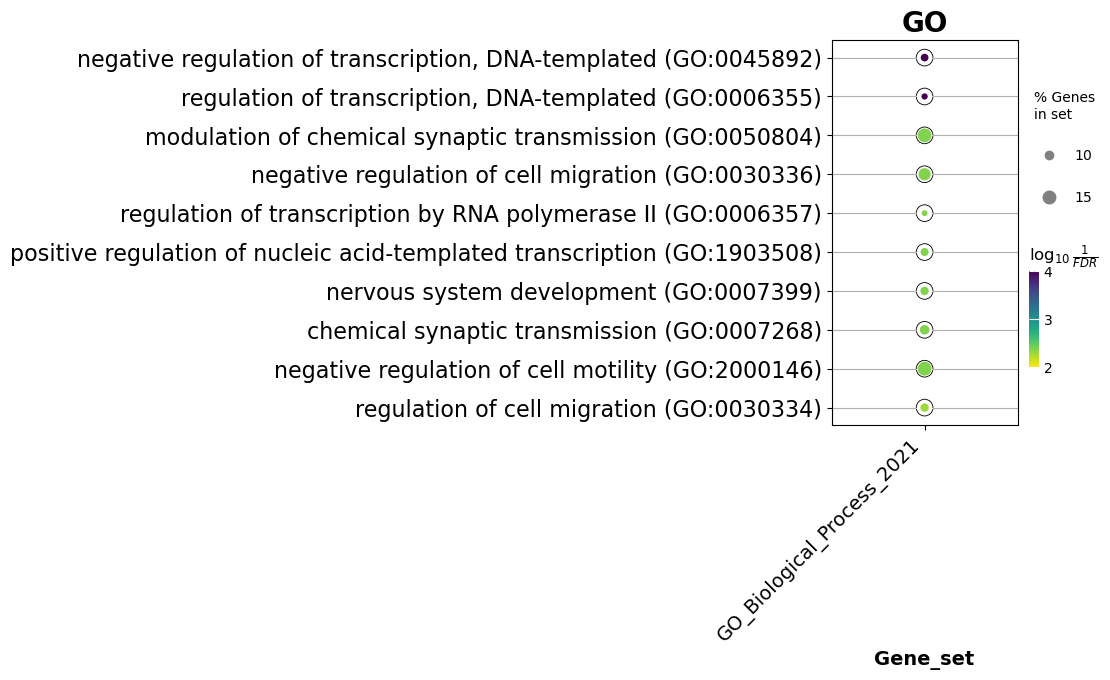

In [78]:
ax = gp.dotplot(SAE_enriched_top1000.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "GO",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


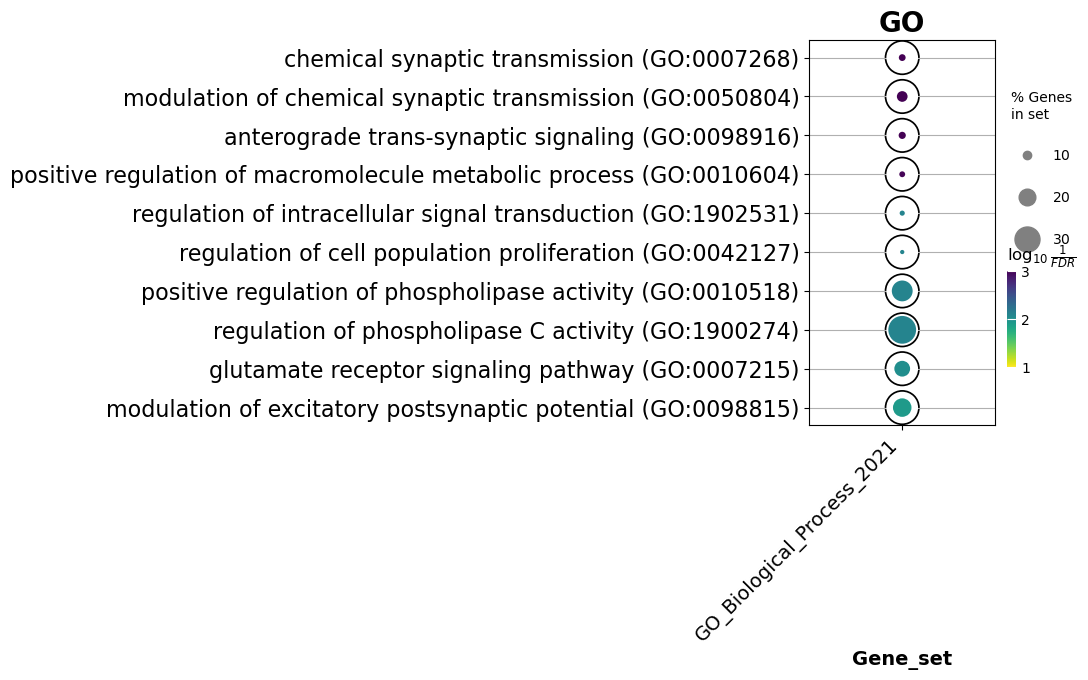

In [79]:
ax = gp.dotplot(SAE_enriched_top500.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "GO",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


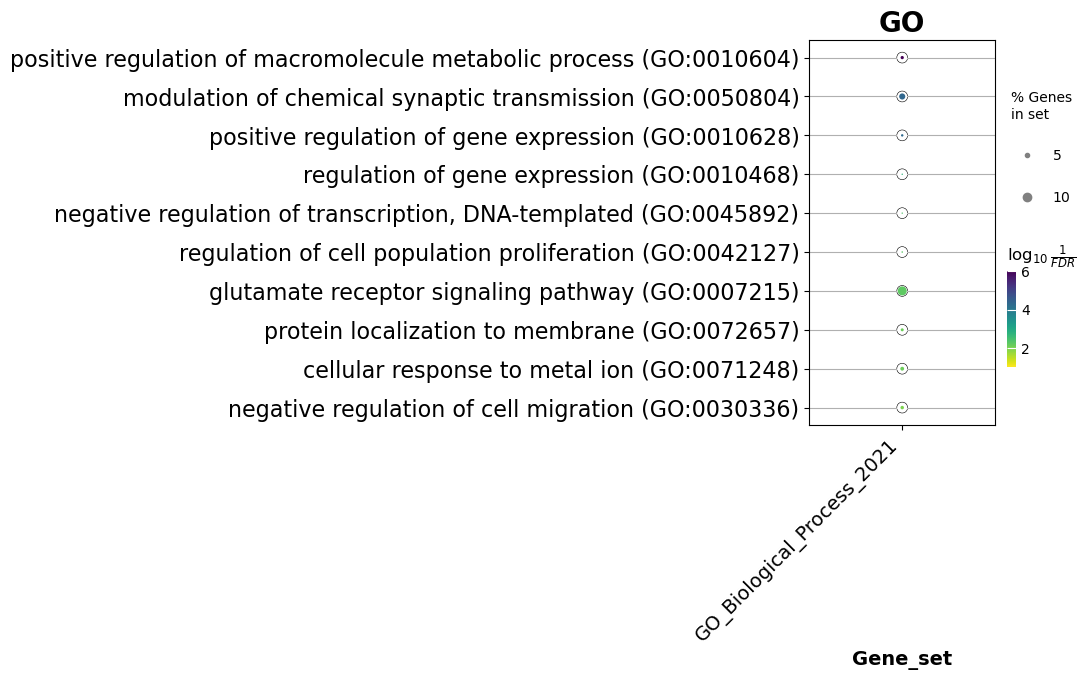

In [80]:
ax = gp.dotplot(SAE_enriched_top100.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "GO",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

In [108]:
SAE_enriched_significant_KEGG = gp.enrichr(gene_list=SAE_significant_genes, 
                            gene_sets='KEGG_2021_Human', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top1000_KEGG = gp.enrichr(gene_list=SAE_top1000, 
                            gene_sets='KEGG_2021_Human', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top500_KEGG = gp.enrichr(gene_list=SAE_top500, 
                            gene_sets='KEGG_2021_Human', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top100_KEGG = gp.enrichr(gene_list=SAE_top100, 
                            gene_sets='KEGG_2021_Human', 
                            organism='human', 
                            outdir=None,
                            )

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


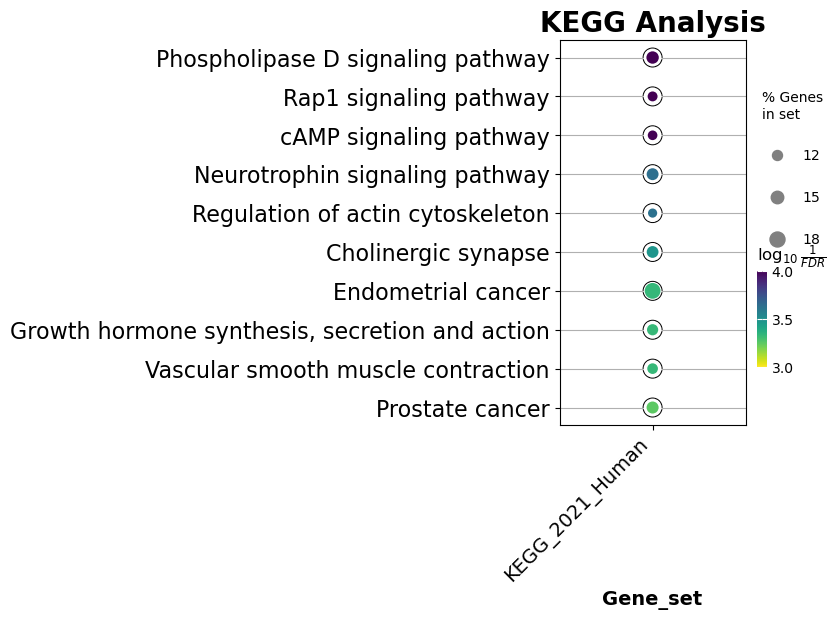

In [102]:
ax = gp.dotplot(SAE_enriched_significant_KEGG.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "KEGG Analysis",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

In [107]:
SAE_enriched_significant_MSig = gp.enrichr(gene_list=SAE_significant_genes, 
                            gene_sets='MSigDB_Hallmark_2020', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top1000_MSig = gp.enrichr(gene_list=SAE_top1000, 
                            gene_sets='MSigDB_Hallmark_2020', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top500_MSig = gp.enrichr(gene_list=SAE_top500, 
                            gene_sets='MSigDB_Hallmark_2020', 
                            organism='human', 
                            outdir=None,
                            )

SAE_enriched_top100_MSig = gp.enrichr(gene_list=SAE_top100, 
                            gene_sets='MSigDB_Hallmark_2020', 
                            organism='human', 
                            outdir=None,
                            )

In [113]:
SAE_enriched_significant_MSig.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Estrogen Response Early,15/200,0.011230,0.268085,0,0,2.034078,9.131292,KDM4B;BCL11B;MAST4;AMFR;GREB1;SNX24;KAZN;ADCY1...
1,MSigDB_Hallmark_2020,KRAS Signaling Dn,15/200,0.011230,0.268085,0,0,2.034078,9.131292,PRKN;RYR2;EDN2;CALCB;THRB;IDUA;DCC;SHOX2;PCDHB...
2,MSigDB_Hallmark_2020,UV Response Dn,11/144,0.024346,0.268085,0,0,2.069620,7.689456,DLG1;ARHGEF9;DLC1;MAGI2;KCNMA1;AMPH;KALRN;LDLR...
3,MSigDB_Hallmark_2020,Spermatogenesis,10/135,0.037025,0.268085,0,0,2.000105,6.592660,TLE4;MTNR1A;MEP1B;DCC;MAST2;GRM8;BRAF;ZC3H14;P...
4,MSigDB_Hallmark_2020,Mitotic Spindle,13/199,0.046175,0.268085,0,0,1.748689,5.377791,DOCK4;STAU1;DST;CSNK1D;SEPTIN9;KLC1;DLG1;CTTN;...


In [112]:
ax = gp.dotplot(SAE_enriched_significant_MSig.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "MSig Analysis",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

ValueError: Warning: No enrich terms when cutoff = 0.05